12Mbps link with 0% loss

patience 10 sample steps

action: cwnd *= 1.1

In [1]:
import numpy as np
import scipy as sp
import scipy.stats
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import csv
import os.path

In [2]:
def preprocess_file(file_name):
    out_file_name = file_name + '.csv'
#    if os.path.exists(out_file_name):
#        return
    with open(out_file_name, 'w') as outfile, open(file_name, 'r', encoding='utf-8') as infile:
        for line in infile:
            line = line.strip()
            if line.endswith(';'):
                outfile.write(line[0:-1] + '\n')

In [3]:
def read_values(file_name, column_num):
    values = []
    with open(file_name,'r') as csvfile:
        rows = csv.reader(csvfile, delimiter=',')
        for row in rows:
            values.append(float(row[column_num]))
    return values

In [13]:
plt.rcParams['figure.figsize'] = (10, 6)

preprocess_file('data/0_percent_loss/logfile')
data_points = 500
step = int(len(y) / data_points)

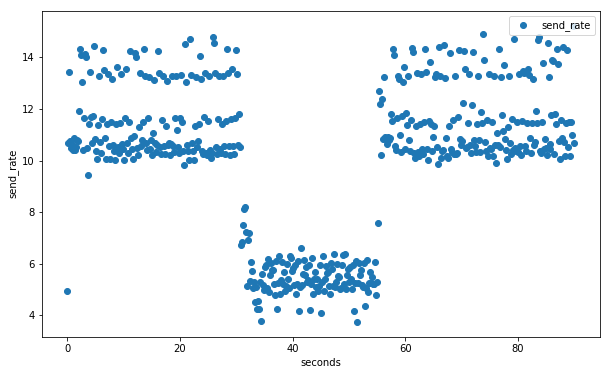

In [14]:
y = read_values('data/0_percent_loss/logfile.csv', 3) # send_rate
y = np.asarray(y)[::step] # TODO moving average

#y = read_values('2_3_3.csv')
x = np.linspace(0, 90, len(y))
plt.scatter(x, y, label='send_rate')
plt.xlabel('seconds')
plt.ylabel('send_rate')
plt.legend(loc='upper right')
plt.show()

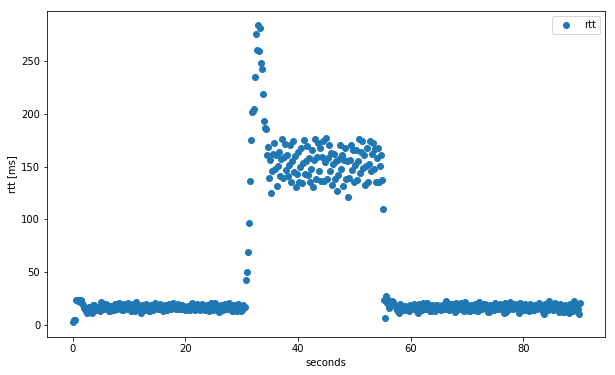

In [22]:
y = read_values('data/0_percent_loss/logfile.csv', 1) # rtt
y = np.asarray(y)[::step] # TODO moving average

#y = read_values('2_3_3.csv')
x = np.linspace(0, 90, len(y))
plt.scatter(x, y, label='rtt')
plt.xlabel('seconds')
plt.ylabel('rtt [ms]')
plt.legend(loc='upper right')
plt.show()

In [17]:
def read_qlen_values(file_name):
    x = []
    y = []
    with open(file_name,'r') as csvfile:
        rows = csv.reader(csvfile, delimiter=',')
        for row in rows:
            y.append(float(row[1]))
    return y

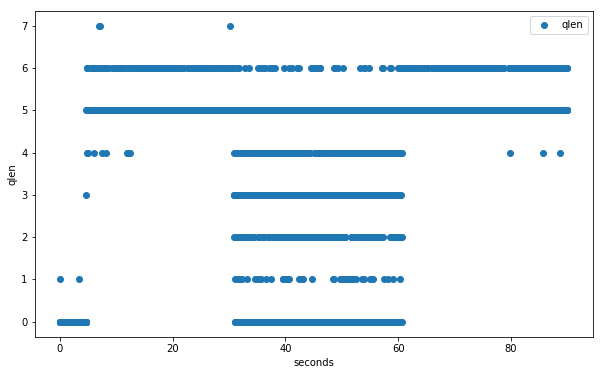

In [27]:
y = read_qlen_values('data/0_percent_loss/qlen_s1-eth1.txt')
#y = np.asarray(y)[::step] # TODO moving average

x = np.linspace(0, 90, len(y))
plt.scatter(x, y, label='qlen')
plt.xlabel('seconds')
plt.ylabel('qlen')
plt.legend(loc='upper right')
plt.show()

In [28]:
# pd.Timestamp(pd.Timestamp.now().value)